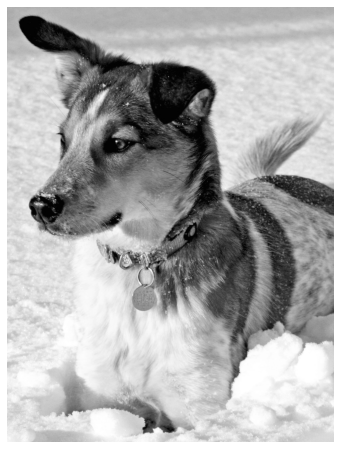

In [13]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
import time
plt.rcParams['figure.figsize'] = [16, 8]


A = imread(os.path.join('..','DATA','dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [7]:
# Matrix information
X.shape

(2000, 1500)

In [50]:
%%time
# Full SVD
U, S, VT = np.linalg.svd(X,full_matrices=True)
print('Dimension of U is ',U.shape)
print('Dimension of S is ',S.shape)
print('Dimension of VT is ',VT.shape)

Dimension of U is  (2000, 2000)
Dimension of S is  (1500,)
Dimension of VT is  (1500, 1500)
Wall time: 1.9 s


In [51]:
def pad(array, reference_shape):
    """
    array: Array to be padded
    reference_shape: tuple of size of ndarray to create
    """
    # Create an array of zeros with the reference shape
    result = np.zeros(reference_shape)
    # Insert the array in the result at the specified offsets
    result[:array.shape[0],:array.shape[1]] = array
    return result
S = np.diag(S)
S = pad(S,X.shape)
S.shape

(2000, 1500)

In [52]:
FullX = U @ S @ VT

In [31]:
%%time
# Economic SVD
U, S, VT = np.linalg.svd(X,full_matrices=False)
print('Dimension of U is ',U.shape)
S = np.diag(S)
print('Dimension of S is ',S.shape)
print('Dimension of VT is ',VT.shape)
ecoX = U @ S @ VT

Dimension of U is  (2000, 1500)
Dimension of S is  (1500, 1500)
Dimension of VT is  (1500, 1500)
Wall time: 1.79 s


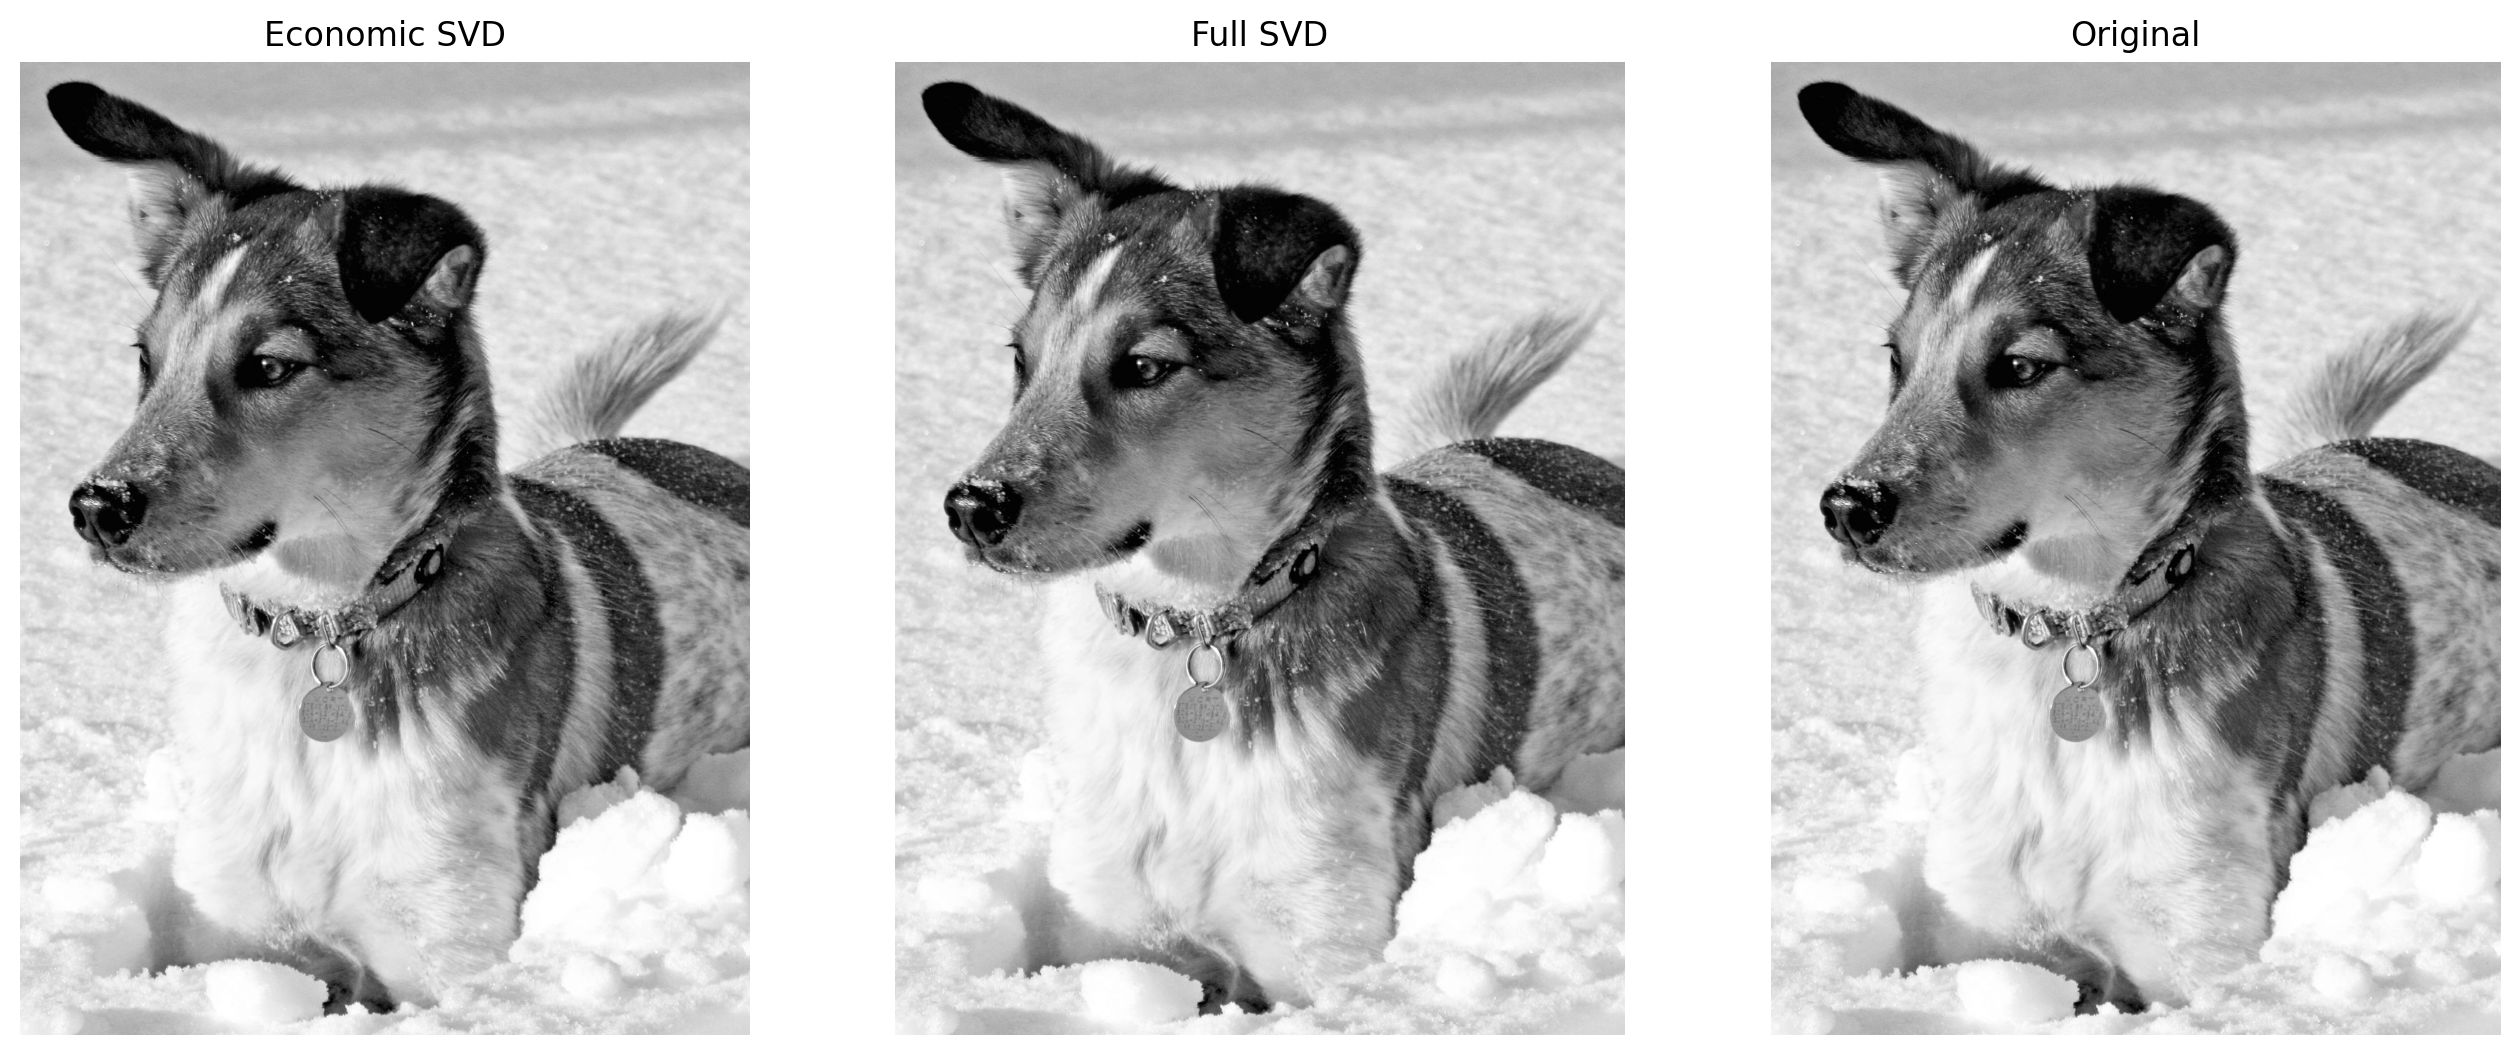

In [55]:
# reconstruct image with the economic SVD
plt.figure(dpi=200)

plt.subplot(1,3,1)
img = plt.imshow(ecoX)
img.set_cmap('gray')
plt.axis('off')
plt.title('Economic SVD' )
plt.subplot(1,3,2)
img = plt.imshow(FullX)
img.set_cmap('gray')
plt.axis('off')
plt.title('Full SVD')

plt.subplot(1,3,3)
img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.title('Original')

plt.show()

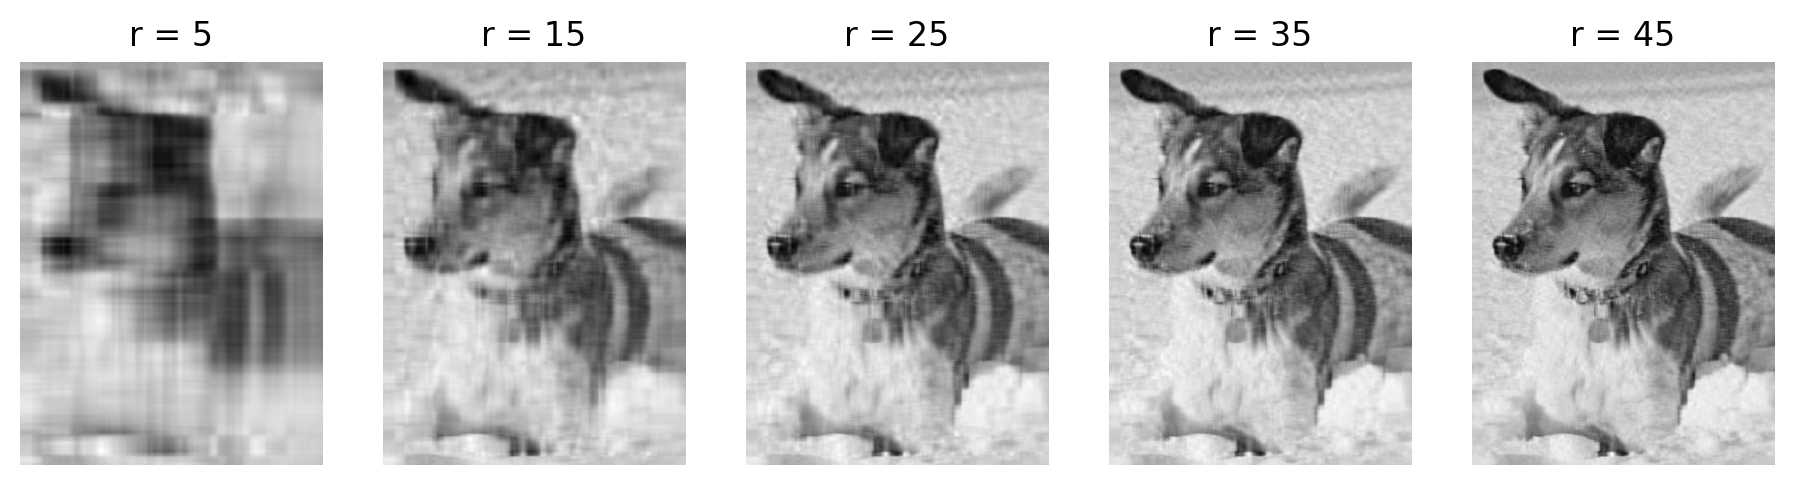

In [46]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
# Convert S into a diagonal matrix
S = np.diag(S)
plt.figure(dpi=200)
for j,r in enumerate(range(5, 50, 10)):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.subplot(1,7,j+1)
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
plt.show()

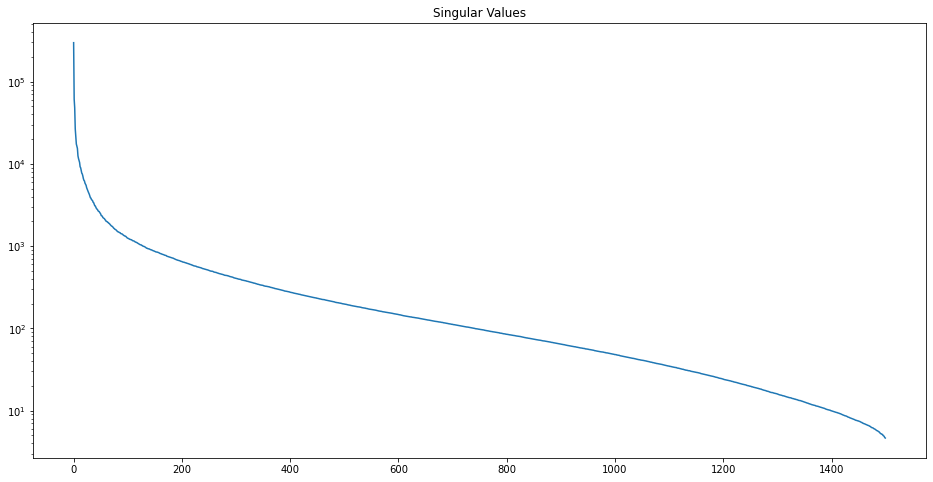

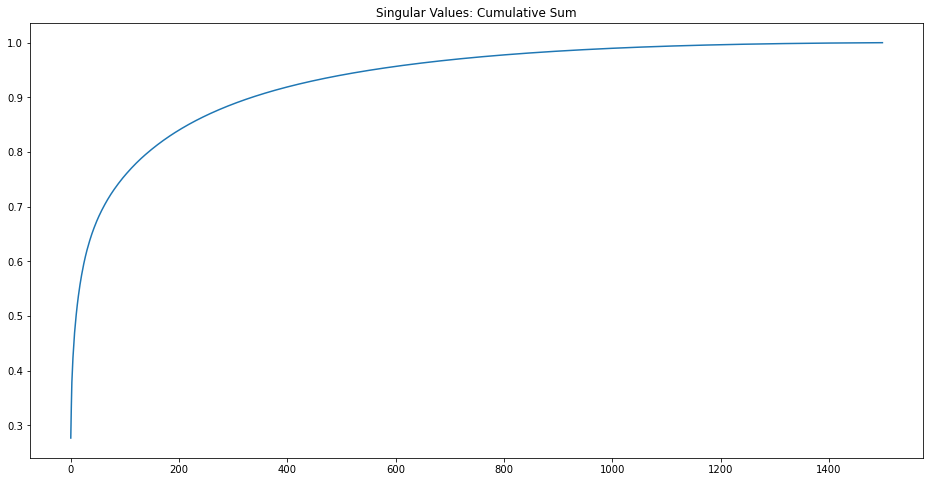

In [3]:
## f_ch01_ex02_2

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

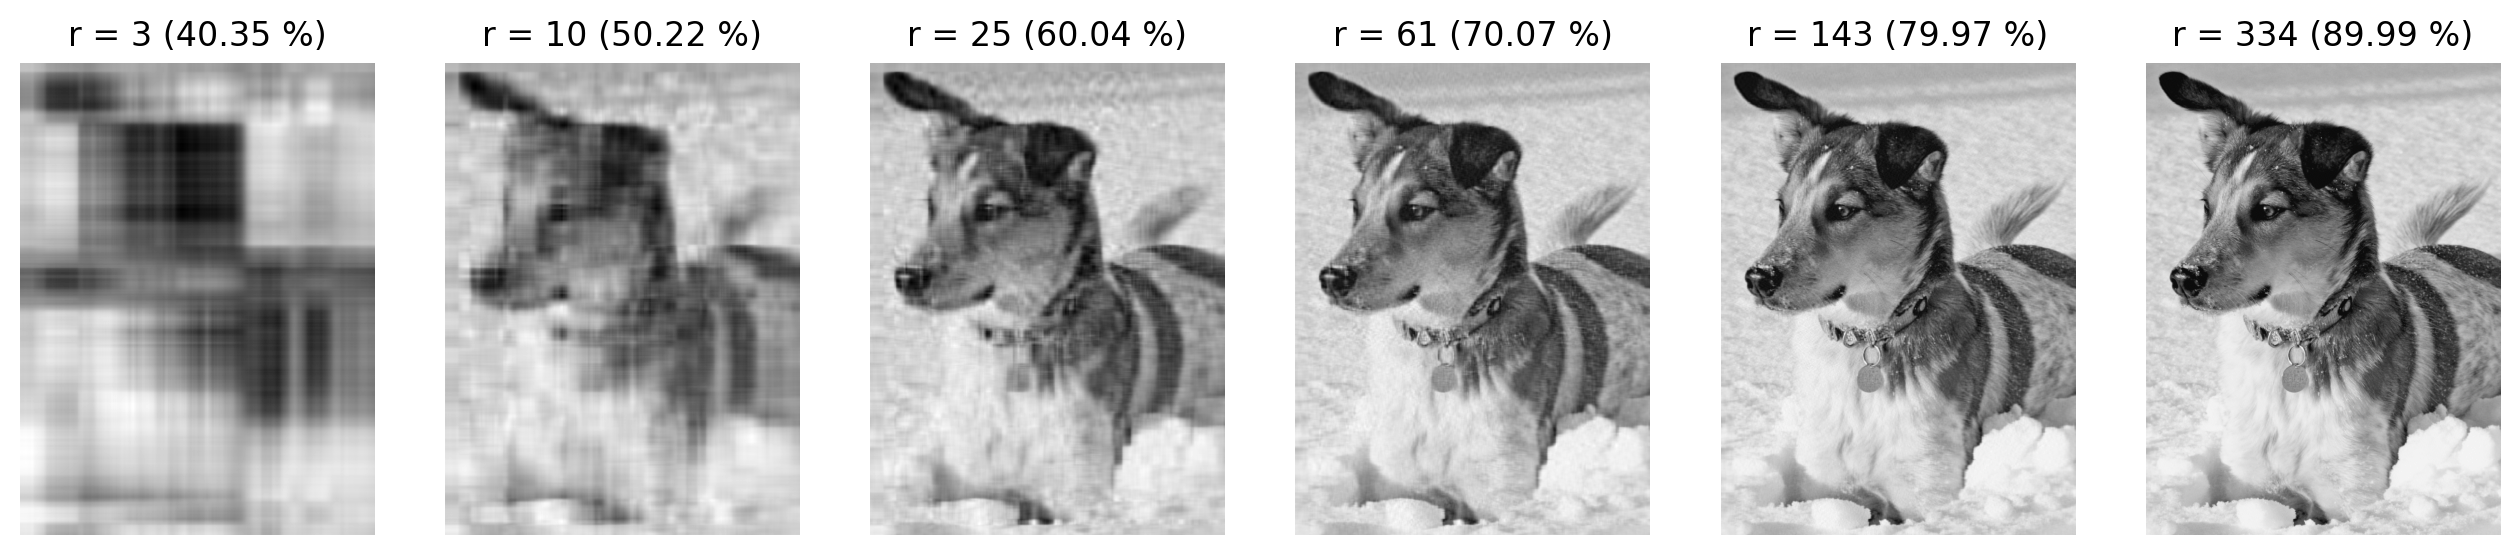

In [74]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
# Convert S into a diagonal matrix
S = np.diag(S)
plt.figure(dpi=200)
rs =  [np.argmin(abs(x-cve)) for x in np.arange(0.4, 0.91, 0.1)]
for j,r in enumerate(rs):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.subplot(1,6,j+1)
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r) + " ({0:.2f} %)".format(cve[r]*100) )
plt.show()